Logistic Regression
---
A logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results in two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the **applicant’s scores** on two exams and the **admission decision**.
The task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

In [1]:
# Make imports
import numpy as np
from matplotlib import pyplot as plt
# inline plotting
%matplotlib inline
# for brevity
np.set_printoptions(threshold=5)

Visualizing the data
---
Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

The file, ex2data1.txt has the data. Let's see what this looks like

0 <= x<sub>1</sub> <= 100,

0 <= x<sub>2</sub> <= 100,

y = 0 or 1[1=accepted, 0=rejected]

|  Exam 1 Score(x<sub>1</sub>) |    Exam 2 Score(x<sub>2</sub>)   | Admission Decision(y) |
|:----------------------------:|:--------------------------------:|:---------------------:|
|           E1_Score_1         |           E2_Score_1             |      decision_1       |
|           E1_Score_2         |           E2_Score_2             |      decision_2       |
|               ...            |               ...                |           ...         |
|            E1_Score_m        |           E2_Score_m             |      decision_m       |

In [2]:
lines = open('datasets/ex2data1.txt').readlines()

# number of training examples
m = len(lines)
# number of features
n = len(lines[0].strip().split(','))-1
# initialize X, the set of inputs(m values(rows), each having 2 features(columns))
X = np.zeros((m,n))
# initialize y, the set of outputs(also has m values(rows), one for each training example). For each x: y = f(x)
y = np.zeros(m)

# separate the input and output 
for i,l in enumerate(lines):
    temp = map(float, l.strip().split(','))
    X[i], y[i] = temp[0:n], temp[n]
print 'Test Scores(X):'
print(X)
print '\n\nAdmission'
print(y)

Test Scores(X):
[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 ..., 
 [ 99.31500881  68.77540947]
 [ 55.34001756  64.93193801]
 [ 74.775893    89.5298129 ]]


Admission
[ 0.  0.  0. ...,  1.  1.  1.]


Accepted Candidates [exam1, exam2]:
[[ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]
 [ 61.10666454  96.51142588]
 ..., 
 [ 99.31500881  68.77540947]
 [ 55.34001756  64.93193801]
 [ 74.775893    89.5298129 ]]


Rejected Candidates [exam1, exam2]:
[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 ..., 
 [ 42.07545454  78.844786  ]
 [ 52.34800399  60.76950526]
 [ 55.48216114  35.57070347]]


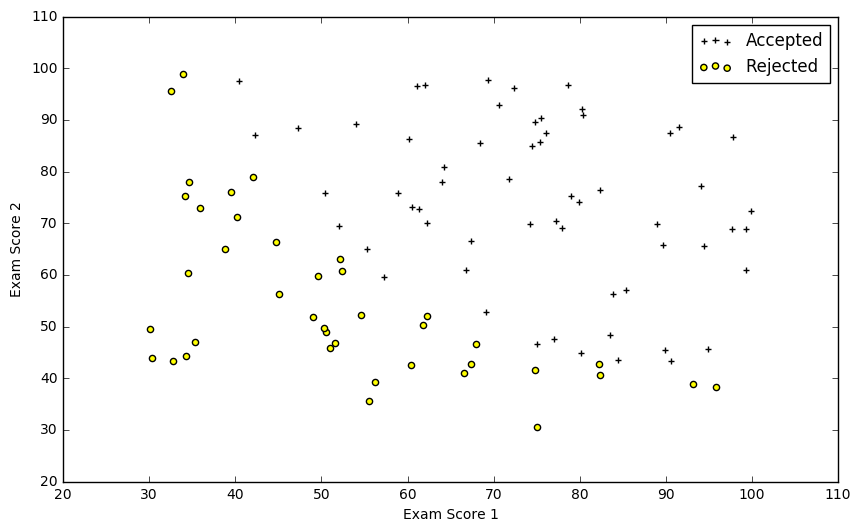

In [3]:
# plots the imported dataset
fig, ax = plt.subplots(figsize=(10, 6))
Xacc = np.array([[X[i,0],X[i,1]] for i in np.where(y[:]==1)[0]])
Xrej = np.array([[X[i,0],X[i,1]] for i in np.where(y[:]==0)[0]])
print 'Accepted Candidates [exam1, exam2]:'
print Xacc
print '\n\nRejected Candidates [exam1, exam2]:'
print Xrej
plt.scatter(Xacc[:,0], Xacc[:,1], c="black", marker="+", label="Accepted")
plt.scatter(Xrej[:,0], Xrej[:,1], c="yellow", marker="o", label="Rejected")
ax.set_xlabel('Exam Score 1')
ax.set_ylabel('Exam Score 2')
plt.legend()

Sigmoid Function - A Hypothesis for Logistic Regression
---

The logistic regression hypothesis is defined as:

\begin{equation*}
h_\theta(x) =
g(\theta^{T}x)
\end{equation*}

where function g is chosen as the sigmoid function(Any suitable function which gives values between 0 and 1 can be chosen). The sigmoid function is defined as:

\begin{equation*}
g(z) =
\frac{1}{(1+e^{-z})}
\end{equation*}

In [4]:
# Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

Logistic Cost Function
---

In [5]:
def computeCost(t, X, y):
    m = X.shape[0]
    # hypothesis
    h = sigmoid(np.dot(X, t))
    c = (float(-1)/m)*(np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))
    return c

In [6]:
def grad(t, X, y):
    hyp = sigmoid(np.dot(X, t))
    deviation = hyp - y
    grad = np.dot(X.T, deviation)*(float(1)/m)
    return grad

In [16]:
# Augment X with a column of zeros to the righmost column
augX = np.insert(X, 0, np.ones(m), axis=1)

# Create a coefficient(theta) vector which has one coeff. for each feature of the input
# An extra coeff for the augmented column so that vector multiplication is possible
theta = np.zeros(n+1)

print "Cost before Gradient Descent: ", computeCost(theta, augX, y)

import scipy.optimize as opt
newTheta = opt.fmin_tnc(func=computeCost, x0=theta, fprime=grad, args=(augX, y))[0]

print "Cost after Gradient Descent: ", computeCost(newTheta, augX, y)

Cost before Gradient Descent:  0.69314718056
Cost after Gradient Descent:  0.203497701589


Plotting the Decision Boundary
---
To plot the decision boundary, let's take a closer look at the range of our hypothesis(sigmoid function):

\begin{equation*}0 \le h_{\theta}(x) \le 1\end{equation*}

And $h_{\theta}(x)$ is the probability that x belongs to class y=1.

If, $h_{\theta}(x) \ge 0.5$, x belongs to class y=1 and it belongs to class y=0 if less than 0.5

Looking back at the graph of the sigmoid function, we see that it gives x=0 as y=0.5.
This means that the line $\theta^{T}x=0$ gives the decision boundary.

Solving this, we get:

\begin{equation*}\theta_0 + \theta_1x_1 + \theta_2x_2 = 0\end{equation*}

\begin{equation*}x_2 = -\frac{\theta_1}{\theta_2}x_1 - \frac{\theta_0}{\theta_2}\end{equation*}

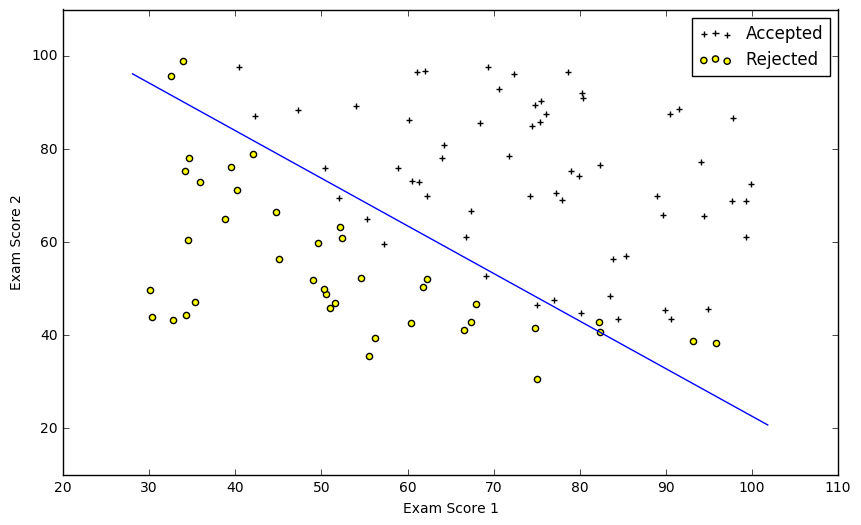

In [17]:
# plots the imported dataset
fig, ax = plt.subplots(figsize=(10, 6))
Xacc = np.array([[X[i,0],X[i,1]] for i in np.where(y[:]==1)[0]])
Xrej = np.array([[X[i,0],X[i,1]] for i in np.where(y[:]==0)[0]])
plt.scatter(Xacc[:,0], Xacc[:,1], c="black", marker="+", label="Accepted")
plt.scatter(Xrej[:,0], Xrej[:,1], c="yellow", marker="o", label="Rejected")

# two extreme points of x1
plot_x = np.array([min(augX[:,1])-2,  max(augX[:,1])+2])

# x2 = (theta1/theta2)x1 - (theta0/theta2)
plot_y = (-1.0/newTheta[2])*(newTheta[1]*plot_x +newTheta[0])
plt.plot(plot_x, plot_y)

ax.set_xlabel('Exam Score 1')
ax.set_ylabel('Exam Score 2')
plt.legend()

In [30]:
predictions = [1 if x >= 0.5 else 0 for x in sigmoid(np.dot(augX, newTheta))]
correct = [1 if a == b else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(float, correct)) / len(correct))*100
print 'accuracy = {0}%'.format(accuracy)

accuracy = 89.0%
